# 05_evaluate.ipynb

**Objective:**  
1. Remount Drive & set paths  
2. Load your saved classifier and the `yale_test` feature arrays  
3. Compute accuracy, classification report, and confusion matrix  
4. Visualize a confusion matrix heatmap  
5. Run a t-SNE on test features and plot the 2D embedding  


In [ ]:
# Cell Tag: imports
import numpy as np
import joblib
import pandas as pd

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [ ]:
# Cell Tag: parameters
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from pathlib import Path
import os

# Paths
ROOT        = Path("/content/drive/My Drive/Colab Notebooks/CPSC 381-581: Machine Learning/Final Project")
FEATURE_DIR = ROOT / "features"
MODEL_DIR   = ROOT / "models"

# Filenames
MODEL_FN    = MODEL_DIR / "resnet50_gap_95var_svc.pkl"
TEST_FN     = FEATURE_DIR / "yale_test_resnet50_gap_95var.npz"

print("Model file:", MODEL_FN)
print("Test feature file:", TEST_FN)


Mounted at /content/drive
Model file: /content/drive/My Drive/Colab Notebooks/CPSC 381-581: Machine Learning/Final Project/models/resnet50_gap_95var_svc.pkl
Test feature file: /content/drive/My Drive/Colab Notebooks/CPSC 381-581: Machine Learning/Final Project/features/yale_test_resnet50_gap_95var.npz


In [ ]:
# Cell Tag: load-and-predict
# 1. Load the model and test features
model = joblib.load(MODEL_FN)
data  = np.load(TEST_FN)
X_test, y_test = data["X"], data["y"]

print("X_test shape:", X_test.shape)
print("y_test distribution:\n", pd.Series(y_test).value_counts())

# 2. Make predictions
y_pred = model.predict(X_test)

# 3. Compute accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")


Exception ignored in: <function NpzFile.__del__ at 0x78f6245a2ca0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/numpy/lib/_npyio_impl.py", line 226, in __del__
  File "/usr/local/lib/python3.11/dist-packages/numpy/lib/_npyio_impl.py", line 221, in close
OSError: [Errno 107] Transport endpoint is not connected


X_test shape: (201, 199)
y_test distribution:
 1    80
2    68
0    53
Name: count, dtype: int64
Test Accuracy: 0.5821


In [ ]:
# Cell Tag: classification-report
# 4. Detailed classification report
classes = sorted(set(y_test))

if (ROOT / "class_names.pkl").exists():
    class_names = pd.read_pickle(ROOT / "class_names.pkl")
else:
    class_names = ["colonial", "brutalist", "gothic"]

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

    colonial       0.42      0.87      0.57        53
   brutalist       0.75      0.72      0.74        80
      gothic       0.87      0.19      0.31        68

    accuracy                           0.58       201
   macro avg       0.68      0.59      0.54       201
weighted avg       0.70      0.58      0.55       201



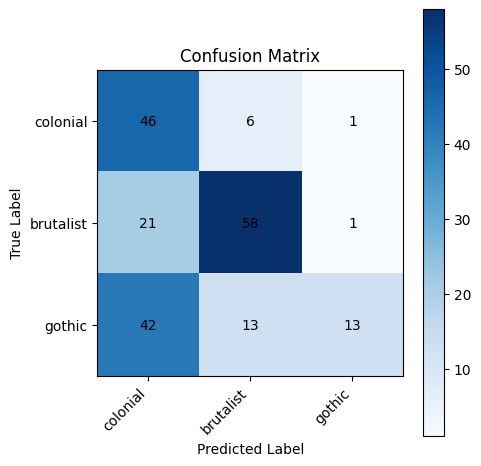

In [ ]:
# 5. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(cm, cmap="Blues")
plt.colorbar(im, ax=ax)

# Tick marks and labels
ticks = np.arange(len(class_names))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(class_names, rotation=45, ha="right")
ax.set_yticklabels(class_names)

# Axis titles
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")

# Annotate cell values
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

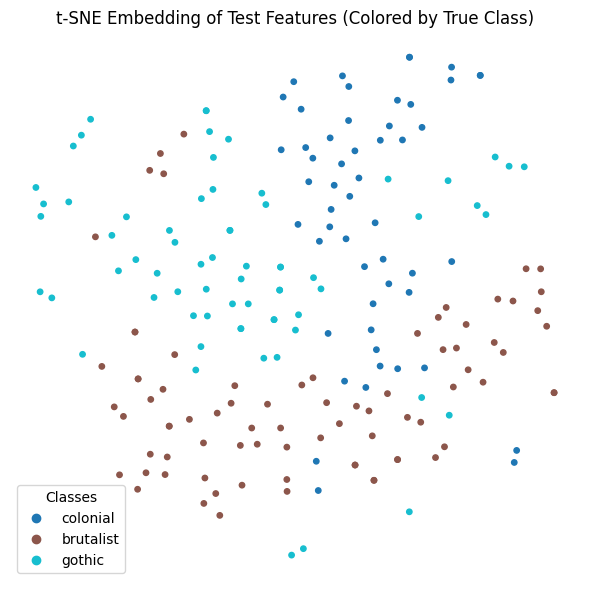

In [ ]:
# Cell Tag: tsne
# 6. t-SNE of test features
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
emb = tsne.fit_transform(X_test)

fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot, colored by true labels
scatter = ax.scatter(emb[:, 0], emb[:, 1], c=y_test, s=15, cmap="tab10")

if class_names:
    handles, _ = scatter.legend_elements()
    ax.legend(handles, class_names, title="Classes", loc="best", frameon=True)

# Plot settings
ax.set_title("t-SNE Embedding of Test Features (Colored by True Class)")
ax.axis("off")
plt.tight_layout()
plt.show()